In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [9]:
weather_df = pd.read_csv('daegu-utf8.csv', encoding="utf8")
print(weather_df.columns)
print(weather_df["날짜"].dtype) # pandas에서 object는 str을 의미함

Index(['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)'], dtype='object')
object


In [10]:
weather_df.columns = ['날짜', '지점', '평균기온', '최저기온', '최고기온']
weather_df

,날짜,지점,평균기온,최저기온,최고기온
0,1907-01-31,143,NaN,-7.0,0.8
1,1907-02-01,143,NaN,NaN,NaN
2,1907-02-02,143,NaN,NaN,NaN
3,1907-02-03,143,NaN,NaN,NaN
4,1907-02-04,143,NaN,NaN,NaN
...,...,...,...,...,...
42699,2023-12-27,143,3.8,-0.9,11.3
42700,2023-12-28,143,3.5,-3.0,10.6
42701,2023-12-29,143,3.1,-2.9,9.5
42702,2023-12-30,143,2.9,-2.9,7.7


In [11]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42704 entries, 0 to 42703
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      42704 non-null  object 
 1   지점      42704 non-null  int64  
 2   평균기온    42001 non-null  float64
 3   최저기온    42075 non-null  float64
 4   최고기온    42074 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


In [12]:
# 날짜 컬럼을 datetime으로 변경
weather_df['날짜']	=	pd.to_datetime(weather_df['날짜'],	format='%Y-%m-%d') # astype("datetime64[ns]")
print(weather_df['날짜'].dtype)

datetime64[ns]


In [20]:
# 누락값 개수 구하기 
print(weather_df.head(5))
print(weather_df.shape)
num_rows = weather_df.shape[0]
num_missing = num_rows - weather_df.count() #count는 결측치는 취급 안함
print("!!!\n",num_missing)

          날짜   지점  평균기온  최저기온  최고기온
0 1907-01-31  143   NaN  -7.0   0.8
1 1907-02-01  143   NaN   NaN   NaN
2 1907-02-02  143   NaN   NaN   NaN
3 1907-02-03  143   NaN   NaN   NaN
4 1907-02-04  143   NaN   NaN   NaN
(42704, 5)
!!!
 날짜        0
지점        0
평균기온    703
최저기온    629
최고기온    630
dtype: int64


In [13]:
import numpy as np
tempDF = pd.DataFrame([np.nan, 10, 20])
tempDF

,0
0,NaN
1,10.0
2,20.0


In [14]:
tempDF.fillna(method="ffill") # NaN 앞에 아무 것도 없으면 안됨 

,0
0,NaN
1,10.0
2,20.0


In [21]:
weather_df =	weather_df.dropna(axis=0)
print(weather_df.count())
print(weather_df.head(5))

날짜      41999
지점      41999
평균기온    41999
최저기온    41999
최고기온    41999
dtype: int64
            날짜   지점  평균기온  최저기온  최고기온
701 1909-01-01  143  -4.1  -8.0   0.1
702 1909-01-02  143  -0.8  -6.7   6.1
703 1909-01-03  143   1.0  -2.4   3.6
704 1909-01-04  143   4.2   0.0   9.2
705 1909-01-05  143   3.4  -0.4   9.0


In [25]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41999 entries, 701 to 42703
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      41999 non-null  datetime64[ns]
 1   지점      41999 non-null  int64         
 2   평균기온    41999 non-null  float64       
 3   최저기온    41999 non-null  float64       
 4   최고기온    41999 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.9 MB


In [22]:
# 결측치 제거 후 csv파일로 저장됨 
weather_df.to_csv('daegu-utf8-df.csv',	index=False,	mode='w',	encoding='utf-8-sig')

In [24]:
# 결측치 제거한 파일 열어서 확인해보기 
drop_after_df = pd.read_csv('daegu-utf8-df.csv', encoding="utf8")
drop_after_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41999 entries, 0 to 41998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   날짜      41999 non-null  object 
 1   지점      41999 non-null  int64  
 2   평균기온    41999 non-null  float64
 3   최저기온    41999 non-null  float64
 4   최고기온    41999 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.6+ MB


## 특정 연도와 달의 최고/최저 기온 평균값 계산 
-해당 연도와 달의 DF 가져오기  
-datetime 객체 접근(dt.year, dt.month, dt.day)

In [29]:
year_df = weather_df[weather_df["날짜"].dt.year == 2023]
ymonth_df = year_df[year_df["날짜"].dt.month == 8]
ymonth_df

,날짜,지점,평균기온,최저기온,최고기온
42551,2023-08-01,143,29.7,24.9,34.8
42552,2023-08-02,143,30.0,23.9,34.7
42553,2023-08-03,143,31.5,27.0,37.7
42554,2023-08-04,143,30.5,26.0,34.7
42555,2023-08-05,143,31.5,25.7,37.2
42556,2023-08-06,143,30.4,26.4,35.6
42557,2023-08-07,143,29.5,26.2,34.6
42558,2023-08-08,143,28.4,25.5,33.2
42559,2023-08-09,143,25.4,24.6,26.8
42560,2023-08-10,143,25.1,22.8,26.6


In [37]:
max_temp_mean = round(ymonth_df["최고기온"].mean(), 1)
min_temp_mean = round(ymonth_df["최저기온"].mean(), 1)
print(f'2023년 8월 최저기온 평균:{min_temp_mean},	최고기온 평균 :{max_temp_mean}')

2023년 8월 최저기온 평균:24.0,	최고기온 평균 :31.9


# 타자 칠 때 뜯으세여

In [67]:
def	draw_two_plots(title,	x_data,	max_temp_list1,	label_y1, max_temp_list2,	label_y2):
    plt.rcParams['axes.unicode_minus'] = False		
    plt.figure(figsize=(10,	4))
    plt.plot(x_data, max_temp_list1,	marker='s',	markersize=6,	color='b',	label=label_y1)
    plt.plot(x_data, max_temp_list2,	marker='s',	markersize=6,	color='r',	label=label_y2)
    plt.xticks(x_data)		#	모든 xtick값을 출력함
    #plt.ylim(10,	40)
    plt.title(title)
    plt.legend()
    plt.show()

달을 입력하세요:	 10


1990년대 10월 최고 기온 평균:	[22.5, 22.0, 21.1, 21.0, 22.9, 22.9, 22.6, 22.9, 23.1, 20.4]
2010년대 10월 최고 기온 평균:	[21.9, 21.2, 22.2, 22.9, 22.0, 22.2, 21.0, 21.2, 20.0, 22.0]


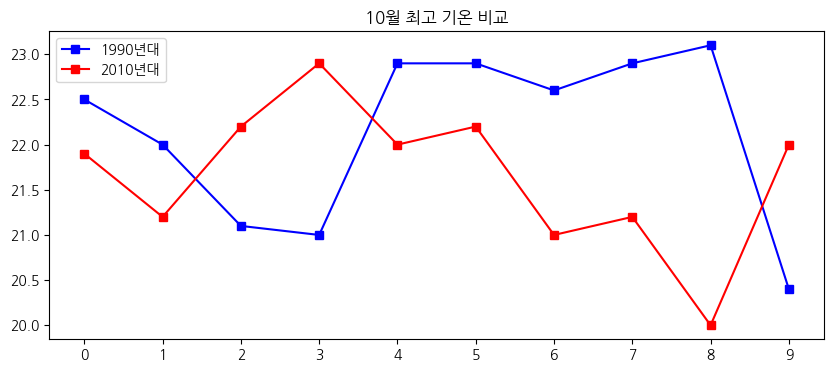

In [70]:
def	main():
    search_month =	int(input("달을 입력하세요:	"))

    first_decade_max_temp_list = [0] * 10
    second_decade_max_temp_list = [0] * 10

    first_decade = 1990
    second_decade = 2010

    for year in range(10):
        first_decade_df = weather_df[(weather_df['날짜'].dt.year ==	first_decade +	year) & (weather_df['날짜'].dt.month ==	search_month)]
        first_decade_max_temp_list[year] = round(first_decade_df['최고기온'].mean(),	1)

        second_decade_df = weather_df[(weather_df['날짜'].dt.year == second_decade + year) & (weather_df['날짜'].dt.month ==	search_month)]
        second_decade_max_temp_list[year] = round(second_decade_df['최고기온'].mean(),	1)

    print(f'{first_decade}년대 {search_month}월 최고 기온 평균:	{first_decade_max_temp_list}')
    print(f'{second_decade}년대 {search_month}월 최고 기온 평균:	{second_decade_max_temp_list}')

    # first_decade_high_temp_mean = round(sum(first_decade_max_temp_list)/len(first_decade_max_temp_list), 1)
    # second_decade_high_temp_mean = round(sum(second_decade_max_temp_list)/len(second_decade_max_temp_list), 1)

    first_decade_max_temp_list = np.array(first_decade_max_temp_list)
    first_decade_high_temp_mean = round(first_decade_max_temp_list.mean(), 1)
    econd_decade_high_temp_mean = round(sum(second_decade_max_temp_list)/len(second_decade_max_temp_list), 1)
	
    #print(f'{first_decade}년대 {search_month}월 전체 최고 기온 평균: {first_decade_high_temp_mean}')
    #print(f'{second_decade}년대 {search_month}월 전체 최고 기온 평균:	{second_decade_high_temp_mean}')
    
    x_data = [i for	i in range(10)]
    draw_two_plots(f'{search_month}월 최고 기온 비교', x_data, 
                   first_decade_max_temp_list, str(first_decade)+'년대',
                   second_decade_max_temp_list, str(second_decade)+'년대')

main()